## Link Lengths
___
- 28 cm, 280 mm total. (~11 inches)
     - 3 cm, 30 mm width
     - 2 cm, 20 mm tab on C
- A,B,C,D,E segments
- D changes, other segments absorb length

In [1]:
# Original segment lengths in inches (A, B, C, D, E)
lengths_in_inches = [2.31035267, 2.15854341, 2.06464767, 2.80062859, 1.91709897]

# Step 1: Convert to millimeters
lengths_in_mm = [length * 25.4 for length in lengths_in_inches]

In [2]:
# Step 2: Calculate total length in mm and scale factor
total_length_in_mm = sum(lengths_in_mm)
scale_factor = 280 / total_length_in_mm

# Step 3: Scale the lengths
scaled_lengths = [length * scale_factor for length in lengths_in_mm]

In [3]:
# Step 4: Round to nearest mm while preserving total length
rounded_lengths = [round(length) for length in scaled_lengths]

# Adjust to ensure the total is exactly 280 mm
difference = 280 - sum(rounded_lengths)
if difference != 0:
    # Distribute the difference to minimize error
    for i in range(abs(difference)):
        index = i % len(rounded_lengths)  # Cycle through indices
        rounded_lengths[index] += 1 if difference > 0 else -1

# Print results
print("Original lengths (mm):", lengths_in_mm)
print(f"Scaled lengths (rounded, mm): A:{rounded_lengths[0]}, B:{rounded_lengths[1]}, C:{rounded_lengths[2]}, D:{rounded_lengths[3]}, E:{rounded_lengths[4]}")
print("Final total length (mm):", sum(rounded_lengths))

Original lengths (mm): [58.68295781799999, 54.827002614, 52.44205081799999, 71.135966186, 48.694313838]
Scaled lengths (rounded, mm): A:57, B:54, C:51, D:70, E:48
Final total length (mm): 280


<div style="text-align: center;">
  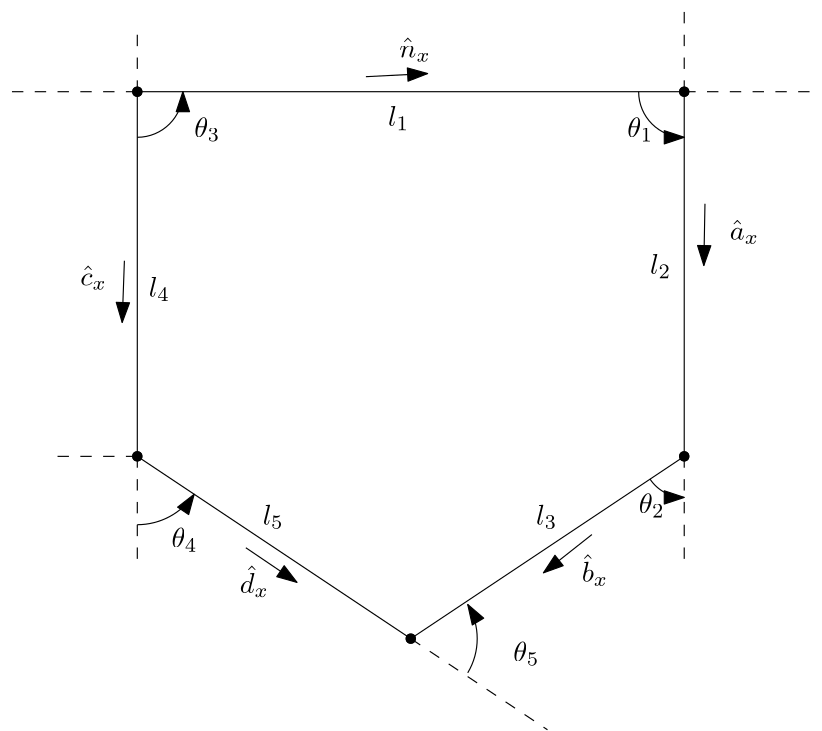
</div>

___
For segments to be in a line, will have to do [tab]-C-D-B-A-E

300 mm total, including tab

In [4]:
segments = {"A": rounded_lengths[0], "B": rounded_lengths[1], "C": rounded_lengths[2], "D": rounded_lengths[3], "E": rounded_lengths[4]}

# C-D-B-A-E
rearranged_segments = [segments["C"], segments["D"], segments["B"], segments["A"], segments["E"]]

# Start with 20 (tab) and add each segment cumulatively
locations = []
current_location = 20
for segment in rearranged_segments:
    current_location += segment
    locations.append(current_location)

print("Rearranged segments (C-D-B-A-E):", rearranged_segments)
print("Cumulative locations:", locations)

Rearranged segments (C-D-B-A-E): [51, 70, 54, 57, 48]
Cumulative locations: [71, 141, 195, 252, 300]


In [12]:
# Percent D of total body
D_percent = rounded_lengths[3] / 280
D_percent

0.25

___
Ok cool. But now I need variations. 

Problem: I need the other segments to stay proportional and absorb the length as %D increases/decreases

New code:

In [23]:
# Original segment lengths in inches
lengths_in_inches = [2.31035267, 2.15854341, 2.06464767, 2.80062859, 1.91709897]

# Convert to millimeters
lengths_in_mm = [length * 25.4 for length in lengths_in_inches]

# Desired percentage of D relative to the total length
desired_percent_D = 0.25  # Adjust this value as needed

# Calculate the new length of D
total_length = 280  # Total length in mm
new_length_D = total_length * desired_percent_D

# Calculate the remaining length for the other segments
remaining_length = total_length - new_length_D

# Calculate the total length of the other segments (excluding original D)
total_other_lengths = sum(lengths_in_mm) - lengths_in_mm[3]

# Scale the other segments proportionally to fit the remaining length
scaled_other_lengths = [
    length * (remaining_length / total_other_lengths)
    for i, length in enumerate(lengths_in_mm) if i != 3
]

# Combine the new length of D with the adjusted lengths
adjusted_lengths = scaled_other_lengths[:3] + [new_length_D] + scaled_other_lengths[3:]

# Round the lengths while preserving the total length of 280 mm
adjusted_rounded_lengths = [round(length) for length in adjusted_lengths]
difference = total_length - sum(adjusted_rounded_lengths)
if difference != 0:
    for i in range(abs(difference)):
        index = i % len(adjusted_rounded_lengths)
        adjusted_rounded_lengths[index] += 1 if difference > 0 else -1

# Assign to A, B, C, D, E and rearrange as C-D-B-A-E
segments = {"A": adjusted_rounded_lengths[0], "B": adjusted_rounded_lengths[1], 
            "C": adjusted_rounded_lengths[2], "D": adjusted_rounded_lengths[3], 
            "E": adjusted_rounded_lengths[4]}
rearranged_segments = [segments["A"], segments["B"], segments["C"], segments["D"], segments["E"]]

# Calculate cumulative locations
locations = []
current_location = 0 # change if the tab is different
for segment in rearranged_segments:
    current_location += segment
    locations.append(current_location)

# Print results
print("Adjusted segment lengths (mm):", adjusted_rounded_lengths)
print("Rearranged segments (A-B-C-D-E):", rearranged_segments)
print("Cumulative locations:", locations)


Adjusted segment lengths (mm): [57, 54, 51, 70, 48]
Rearranged segments (A-B-C-D-E): [57, 54, 51, 70, 48]
Cumulative locations: [57, 111, 162, 232, 280]


___
**Values for 0.20 body length D:**
    
     segments (A-B-C-D-E): [61, 57, 55, 56, 51]
    
    Cumulative locations: [61, 118, 173, 229, 280]

**Values for 0.22 body length D:**
    
     segments (A-B-C-D-E): [59, 56, 53, 62, 50]
    
    Cumulative locations: [59, 115, 168, 230, 280]

**Values for 0.25 body length D:**
    
     segments (A-B-C-D-E): [57, 54, 51, 70, 48]
    
    Cumulative locations: [57, 111, 162, 232, 280]
